<a href="https://colab.research.google.com/github/nancyosama/The-sparks-foundation/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 
# Trying to findout the weak areas where I can work to make more **profit**

### importing libraries:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim

In [ ]:
!pip install tqdm

You should consider upgrading via the 'c:\users\nancy\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
df=pd.read_csv('SampleSuperstore.csv')

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Data cleaning

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df['Country'].unique()

array(['United States'], dtype=object)

In [10]:
df.drop('Country',inplace=True,axis=1)

In [11]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [17]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [19]:
def ShowDetails():
    global df
    for col in df.columns : 
        print(f'for feature {col}')
        print(f'Number of Nulls is {df[col].isna().sum()}')
        print(f'Number of Unique Values is {len(df[col].unique())}')
        print(f'Unique Values is {df[col].unique()}')
        print(f'Random Value is {df[col][np.random.randint(df.shape[0])]}')
        print(f'Random Value is {df[col][np.random.randint(df.shape[0])]}')
        print(f'Random Value is {df[col][np.random.randint(df.shape[0])]}')
        print('\n\n==================================\n\n')

In [20]:
ShowDetails()

for feature Ship Mode
Number of Nulls is 0
Number of Unique Values is 4
Unique Values is ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Random Value is First Class
Random Value is Standard Class
Random Value is Same Day




for feature Segment
Number of Nulls is 0
Number of Unique Values is 3
Unique Values is ['Consumer' 'Corporate' 'Home Office']
Random Value is Home Office
Random Value is Corporate
Random Value is Corporate




for feature City
Number of Nulls is 0
Number of Unique Values is 531
Unique Values is ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol'

In [21]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [22]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [23]:
df[df['Profit']>0]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [24]:
wrong_indices= df[df['Profit']<0].index
wrong_indices

Int64Index([   3,   14,   15,   23,   27,   28,   32,   36,   38,   39,
            ...
            9878, 9899, 9903, 9912, 9919, 9920, 9921, 9931, 9937, 9962],
           dtype='int64', length=1871)

In [25]:
df.drop(df[df['Profit']<0].index,axis=0,inplace=True)

In [26]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [27]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [28]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,55005.941278,225.100789,3.795765,0.081417,54.478433
std,33295.504258,600.056721,2.244043,0.099192,212.913326
min,1040.000000,0.990000,1.000000,0.000000,0.000000
25%,21477.500000,17.940000,2.000000,0.000000,5.193000
50%,53711.000000,51.750000,3.000000,0.000000,13.070700
75%,90045.000000,195.640000,5.000000,0.200000,40.170200
max,99301.000000,17499.950000,14.000000,0.400000,8399.976000


In [29]:
def classify_the_profit(x):
    if x<=2100:
        return 'low'
    elif 2100<x<=4200:
        return 'medium'
    elif 4200<x<=6300:
        return 'high'
    else:
        return 'very high'
df['profit_classification']=df['Profit'].apply(classify_the_profit)

In [30]:
df['profit_classification'].value_counts()

low          8108
medium         10
high            3
very high       2
Name: profit_classification, dtype: int64

# Create dashboards and classify areas with respect to the profit 

### Areas contain very low profit

In [32]:
df['profit_classification'].value_counts()

low          8108
medium         10
high            3
very high       2
Name: profit_classification, dtype: int64

In [33]:
#8108 row have low profit
low_indices=(df[df['profit_classification']=='low']).index

In [34]:
df_2=df.loc[low_indices,df.columns]

In [35]:
df_2

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136,low
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820,low
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714,low
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164,low
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028,low
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,low
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,low
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,low


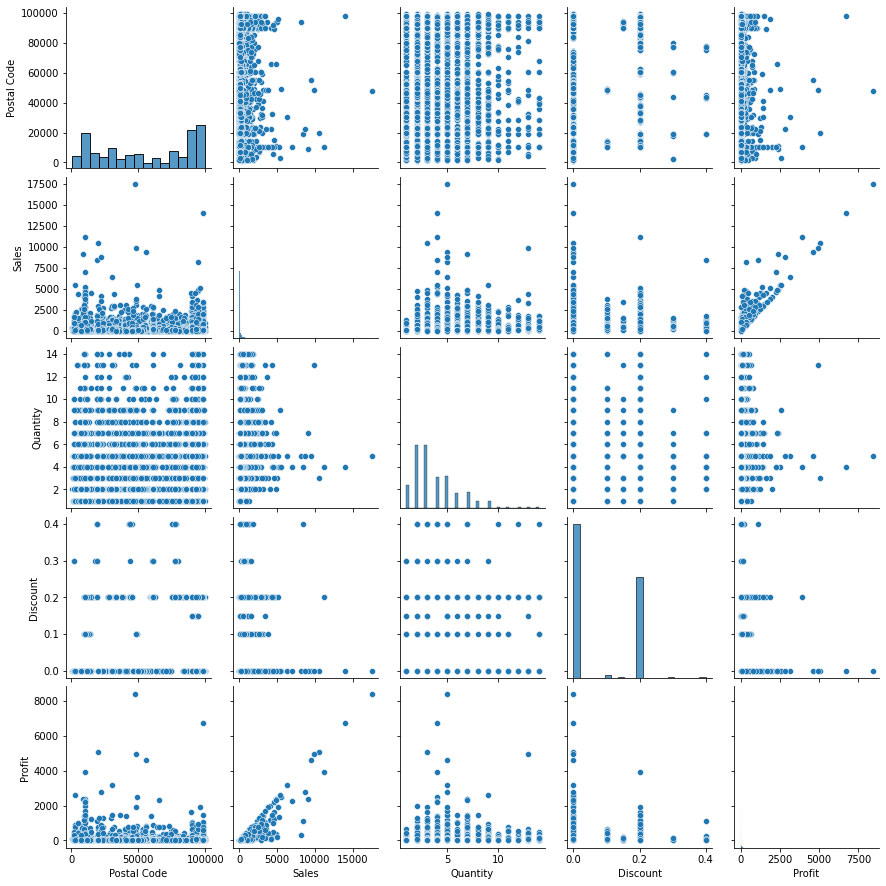

In [122]:
sns.pairplot(df)

In [37]:
df_2['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Wisconsin', 'Utah', 'Nebraska', 'Pennsylvania',
       'Texas', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Colorado', 'Oregon', 'Massachusetts', 'Georgia', 'Nevada',
       'Rhode Island', 'Mississippi', 'Arkansas', 'Montana',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia'], dtype=object)

In [38]:
from tqdm import tqdm
#city=list(df['City'])
latitude={}
geolocator = Nominatim(user_agent="mm")
for i in tqdm(df['City'].unique()):
              location = geolocator.geocode(i)
              latitude[i]=location.raw['lat']

100%|██████████| 513/513 [04:16<00:00,  2.00it/s]


In [39]:
latitude

{'Aberdeen': '57.1482429',
 'Akron': '41.083064',
 'Albuquerque': '35.0841034',
 'Alexandria': '31.199004',
 'Allen': '37.8882168',
 'Allentown': '40.6022059',
 'Altoona': '40.518681',
 'Amarillo': '35.2072185',
 'Anaheim': '33.8347516',
 'Andover': '45.2332985',
 'Ann Arbor': '42.2681569',
 'Antioch': '38.0049214',
 'Apopka': '28.6779683',
 'Apple Valley': '44.7319094',
 'Appleton': '44.2613967',
 'Arlington': '32.701938999999996',
 'Arlington Heights': '42.0811563',
 'Arvada': '39.8005505',
 'Asheville': '35.6009498',
 'Athens': '37.9839412',
 'Atlanta': '33.7489924',
 'Atlantic City': '39.3642852',
 'Auburn': '32.6098566',
 'Aurora': '41.7571701',
 'Austin': '30.2711286',
 'Avondale': '33.4355977',
 'Bakersfield': '35.3738712',
 'Baltimore': '39.2908816',
 'Bangor': '44.8011821',
 'Bartlett': '41.9908485',
 'Bayonne': '43.4933379',
 'Baytown': '29.7355047',
 'Beaumont': '30.0860459',
 'Bedford': '52.1363806',
 'Belleville': '48.8176714',
 'Bellevue': '47.6144219',
 'Bellingham': '48

In [40]:
longitude={}
for i in tqdm(df['City'].unique()):
              location = geolocator.geocode(i)
              longitude[i]=location.raw['lon']

100%|██████████| 513/513 [04:16<00:00,  2.00it/s]


In [41]:
longitude

{'Aberdeen': '-2.0928095',
 'Akron': '-81.518485',
 'Albuquerque': '-106.650985',
 'Alexandria': '29.894378',
 'Allen': '-95.3170208',
 'Allentown': '-75.4712794',
 'Altoona': '-78.394736',
 'Amarillo': '-101.8338246',
 'Anaheim': '-117.911732',
 'Andover': '-93.2913405',
 'Ann Arbor': '-83.7312291',
 'Antioch': '-121.805789',
 'Apopka': '-81.5115214',
 'Apple Valley': '-93.21772',
 'Appleton': '-88.4069744',
 'Arlington': '-97.10562379033699',
 'Arlington Heights': '-87.9802164',
 'Arvada': '-105.0811573',
 'Asheville': '-82.5540161',
 'Athens': '23.7283052',
 'Atlanta': '-84.3902644',
 'Atlantic City': '-74.4229351',
 'Auburn': '-85.4807825',
 'Aurora': '-88.3147539',
 'Austin': '-97.7436995',
 'Avondale': '-112.349602',
 'Bakersfield': '-119.0194639',
 'Baltimore': '-76.610759',
 'Bangor': '-68.7778138',
 'Bartlett': '-88.1850028',
 'Bayonne': '-1.475099',
 'Baytown': '-94.9774274',
 'Beaumont': '-94.1018461',
 'Bedford': '-0.4675041',
 'Belleville': '6.0982683',
 'Bellevue': '-122.

In [42]:
df['City'].value_counts()

New York City    875
Los Angeles      710
San Francisco    486
Seattle          412
Philadelphia     287
                ... 
Orland Park        1
Whittier           1
Holyoke            1
Iowa City          1
Mason              1
Name: City, Length: 513, dtype: int64

In [43]:
df_2['latitude']=df_2['City'].map(latitude)
df_2['longitude']=df_2['City'].map(longitude)

In [123]:
df_2

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification,latitude,longitude
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136,low,32.182598,-95.789318
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820,low,32.182598,-95.789318
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714,low,34.053691,-118.242766
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164,low,26.122308,-80.143379
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694,low,34.053691,-118.242766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028,low,25.774173,-80.193620
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,low,33.663661,-117.919465
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,low,33.663661,-117.919465
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,low,33.663661,-117.919465


In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship Mode              8108 non-null   object 
 1   Segment                8108 non-null   object 
 2   City                   8108 non-null   object 
 3   State                  8108 non-null   object 
 4   Postal Code            8108 non-null   int64  
 5   Region                 8108 non-null   object 
 6   Category               8108 non-null   object 
 7   Sub-Category           8108 non-null   object 
 8   Sales                  8108 non-null   float64
 9   Quantity               8108 non-null   int64  
 10  Discount               8108 non-null   float64
 11  Profit                 8108 non-null   float64
 12  profit_classification  8108 non-null   object 
 13  latitude               8108 non-null   object 
 14  longitude              8108 non-null   object 
dtypes: f

In [46]:
df_2['latitude']=pd.to_numeric(df_2['latitude'],errors='raise')

In [47]:
df_2['longitude']=pd.to_numeric(df_2['longitude'],errors='raise')

In [48]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship Mode              8108 non-null   object 
 1   Segment                8108 non-null   object 
 2   City                   8108 non-null   object 
 3   State                  8108 non-null   object 
 4   Postal Code            8108 non-null   int64  
 5   Region                 8108 non-null   object 
 6   Category               8108 non-null   object 
 7   Sub-Category           8108 non-null   object 
 8   Sales                  8108 non-null   float64
 9   Quantity               8108 non-null   int64  
 10  Discount               8108 non-null   float64
 11  Profit                 8108 non-null   float64
 12  profit_classification  8108 non-null   object 
 13  latitude               8108 non-null   float64
 14  longitude              8108 non-null   float64
dtypes: f

In [49]:
df_2.isnull().sum()

Ship Mode                0
Segment                  0
City                     0
State                    0
Postal Code              0
Region                   0
Category                 0
Sub-Category             0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
profit_classification    0
latitude                 0
longitude                0
dtype: int64

In [73]:
import folium
#importing my map
my_map=folium.Map(zoom_start=2)
my_map

In [ ]:
#create a marker to mark the city on the map
for _,city in df_2.iterrows():
    folium.Marker(
        location=[city['latitude'],city['longitude']]
    ).add_to(my_map)
my_map

# these places are the weak areas 

### Areas contain medium profits with their corresponing latitudes and longitudes

In [74]:
medium_indices=(df[df['profit_classification']=='medium']).index

# these places are also weak areas as more than 50 % of the data contain weak areas which their profit need to be improved

In [75]:
df_3=df.loc[medium_indices,df.columns]
df_3

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification
509,Standard Class,Consumer,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,medium
1085,Standard Class,Consumer,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657,medium
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,medium
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,medium
6520,Second Class,Consumer,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216,medium
6626,Standard Class,Consumer,New York City,New York,10024,East,Technology,Machines,6999.960,4,0.0,2239.9872,medium
7666,Standard Class,Home Office,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568,medium
8204,Same Day,Corporate,New York City,New York,10024,East,Technology,Machines,4643.800,4,0.0,2229.0240,medium
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,medium
8990,Standard Class,Corporate,Springfield,Missouri,65807,Central,Technology,Copiers,4899.930,7,0.0,2302.9671,medium


In [102]:
#locate areas 
df_3['latitude']=df_3['City'].map(latitude)
df_3['longitude']=df_3['City'].map(longitude)
df_3['longitude']=pd.to_numeric(df_3['longitude'],errors='raise')


In [103]:
df_3['latitude']=pd.to_numeric(df_3['latitude'],errors='raise')


In [105]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 509 to 8990
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship Mode              10 non-null     object 
 1   Segment                10 non-null     object 
 2   City                   10 non-null     object 
 3   State                  10 non-null     object 
 4   Postal Code            10 non-null     int64  
 5   Region                 10 non-null     object 
 6   Category               10 non-null     object 
 7   Sub-Category           10 non-null     object 
 8   Sales                  10 non-null     float64
 9   Quantity               10 non-null     int64  
 10  Discount               10 non-null     float64
 11  Profit                 10 non-null     float64
 12  profit_classification  10 non-null     object 
 13  latitude               10 non-null     float64
 14  longitude              10 non-null     float64
dtypes: f

In [104]:
df_3

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification,latitude,longitude
509,Standard Class,Consumer,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,medium,33.748992,-84.390264
1085,Standard Class,Consumer,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657,medium,40.931210,-73.898747
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,medium,40.712728,-74.006015
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,medium,39.708574,-105.084669
6520,Second Class,Consumer,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216,medium,32.299002,-90.184769
6626,Standard Class,Consumer,New York City,New York,10024,East,Technology,Machines,6999.960,4,0.0,2239.9872,medium,40.712728,-74.006015
7666,Standard Class,Home Office,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568,medium,41.823989,-71.412834
8204,Same Day,Corporate,New York City,New York,10024,East,Technology,Machines,4643.800,4,0.0,2229.0240,medium,40.712728,-74.006015
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,medium,32.701939,-97.105624
8990,Standard Class,Corporate,Springfield,Missouri,65807,Central,Technology,Copiers,4899.930,7,0.0,2302.9671,medium,39.799017,-89.643957


In [119]:
#create a marker to mark the city on the map
my_map=folium.Map(zoom_start=2)
for _,city in df_3.iterrows():
    folium.Marker(
        location=[city['latitude'],city['longitude']]
    ).add_to(my_map)
my_map

In [79]:
df_3

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification,latitude,longitude
509,Standard Class,Consumer,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,medium,33.7489924,-84.3902644
1085,Standard Class,Consumer,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657,medium,40.9312099,-73.8987469
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,medium,40.7127281,-74.0060152
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,medium,39.7085736,-105.0846694
6520,Second Class,Consumer,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216,medium,32.2990021,-90.1847691
6626,Standard Class,Consumer,New York City,New York,10024,East,Technology,Machines,6999.960,4,0.0,2239.9872,medium,40.7127281,-74.0060152
7666,Standard Class,Home Office,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568,medium,41.8239891,-71.4128343
8204,Same Day,Corporate,New York City,New York,10024,East,Technology,Machines,4643.800,4,0.0,2229.0240,medium,40.7127281,-74.0060152
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,medium,32.701938999999996,-97.10562379033699
8990,Standard Class,Corporate,Springfield,Missouri,65807,Central,Technology,Copiers,4899.930,7,0.0,2302.9671,medium,39.7990175,-89.6439575


### Areas contain high profits with their corresponing latitudes and longitudes

In [107]:
high_indices=(df[df['profit_classification']=='high']).index
df_4=df.loc[high_indices,df.columns]
df_4

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.95,5,0.0,4630.4755,high
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.97,3,0.0,5039.9856,high
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.74,13,0.0,4946.3700,high


In [108]:
#locate areas 
df_4['latitude']=df_4['City'].map(latitude)
df_4['longitude']=df_4['City'].map(longitude)

In [109]:
df_4['longitude']=pd.to_numeric(df_4['longitude'],errors='raise')
df_4['latitude']=pd.to_numeric(df_4['latitude'],errors='raise')

In [110]:
df_4

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification,latitude,longitude
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.95,5,0.0,4630.4755,high,44.977300,-93.265469
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.97,3,0.0,5039.9856,high,40.735657,-74.172367
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.74,13,0.0,4946.3700,high,42.331551,-83.046640


In [111]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 4098 to 9039
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ship Mode              3 non-null      object 
 1   Segment                3 non-null      object 
 2   City                   3 non-null      object 
 3   State                  3 non-null      object 
 4   Postal Code            3 non-null      int64  
 5   Region                 3 non-null      object 
 6   Category               3 non-null      object 
 7   Sub-Category           3 non-null      object 
 8   Sales                  3 non-null      float64
 9   Quantity               3 non-null      int64  
 10  Discount               3 non-null      float64
 11  Profit                 3 non-null      float64
 12  profit_classification  3 non-null      object 
 13  latitude               3 non-null      float64
 14  longitude              3 non-null      float64
dtypes: f

In [120]:
#create a marker to mark the city on the map
my_map=folium.Map(zoom_start=2)
for _,city in df_4.iterrows():
    folium.Marker(
        location=[city['latitude'],city['longitude']]
    ).add_to(my_map)
my_map

### Areas contain very high profits with their corresponing latitudes and longitudes

In [113]:
very_high_indices=(df[df['profit_classification']=='very high']).index
df_5=df.loc[very_high_indices,df.columns]
df_5

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.9760,very high
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.96,4,0.0,6719.9808,very high


In [114]:
#locate areas 
df_5['latitude']=df_5['City'].map(latitude)
df_5['longitude']=df_5['City'].map(longitude)

In [115]:
df_5

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_classification,latitude,longitude
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.9760,very high,30.2043259,-92.0298813
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.96,4,0.0,6719.9808,very high,47.6038321,-122.3300624


In [116]:
df_5['longitude']=pd.to_numeric(df_5['longitude'],errors='raise')
df_5['latitude']=pd.to_numeric(df_5['latitude'],errors='raise')

In [121]:
#create a marker to mark the city on the map
my_map=folium.Map(zoom_start=2)
for _,city in df_5.iterrows():
    folium.Marker(
        location=[city['latitude'],city['longitude']]
    ).add_to(my_map)
my_map

### as sales inccreases the profit increases , profit is not affected by the quantity